### RFLab Data - Unprocessed, 7T

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 40]

In [3]:
import radio as rio
from radio.data.datautils import get_first_batch, plot_batch

#### Setup Data

In [45]:
# Load pre-stored data from train/test/val folders 
data = rio.data.RFLabDataModule(
    root="/media/cerebro/Workspaces/Students/Eduardo_Diniz/Studies",
    study="RFLab_test",
    subj_dir="radio",
    data_dir="",
    use_augmentation=False,
    use_preprocessing=False,
    resample=False,
    batch_size=4,
    modalities=["7T_MPR"],
    labels=[],
    dims=None,
)
data.prepare_data()
data.setup()

odict_keys(['000042-20180801150853', '000069-20200107115213', '00069-20191105185338', '0008-20171011161114', '0575ma72-20190508100311', '1189-20181120173551', '999977-20180501173826', 'HBI_350021_2-20160418103914', 'SCD-6XX-20171115161837', 'STD-131221107523418914-20200212145929'])
odict_keys(['1139-221969_T2-20200121111643', '190925-Volunteer_SS-20190925165632', 'PRT191103-20190813170835'])
odict_keys(['000072-20200218113642', '00059-20190108181759'])
odict_keys(['000042-20180801150853', '000069-20200107115213', '00069-20191105185338', '0008-20171011161114', '0575ma72-20190508100311', '1189-20181120173551', '999977-20180501173826', 'HBI_350021_2-20160418103914', 'SCD-6XX-20171115161837', 'STD-131221107523418914-20200212145929'])
odict_keys(['1139-221969_T2-20200121111643', '190925-Volunteer_SS-20190925165632', 'PRT191103-20190813170835'])
odict_keys(['000072-20200218113642', '00059-20190108181759'])
odict_keys(['000042-20180801150853', '000069-20200107115213', '00069-20191105185338', 

In [70]:
# Takes a while because it scans CEREBRO Study directory for the data.
# Pre-storing the data into train and test folders will speed up the process.
data = rio.data.RFLabDataModule(
    root="/data",
    study="RFLab",
    subj_dir="NII/unprocessed",
    data_dir="",
    use_augmentation=False,
    use_preprocessing=False,
    resample=False,
    batch_size=1,
    modalities=["7T_MPR"],
    labels=[],
    dims=(368, 480, 384),
)
data.prepare_data()
data.setup()

In [71]:
print(f"Training: {data.size_train} subjects.")
print(f"Validation: {data.size_val} subjects.")
print(f"Test: {data.size_test} subjects.")

Training: 608 subjects.
Validation: 152 subjects.
Test: 182 subjects.


#### Get a Train and a Test Batch

In [72]:
train_dataloader = data.train_dataloader()
val_dataloader = data.val_dataloader()
test_dataloader = data.test_dataloader()

In [61]:
# Takes a long time if resampling is required.
# Preprocessing beforehand is therefore recommended to speed up training.
train_batch = get_first_batch(train_dataloader)
test_batch = get_first_batch(test_dataloader)

In [62]:
print(f"Batch keys: {train_batch.keys()}")
print(f"Sample shape: {train_batch['7T_MPR']['data'].shape}")
print(f"Image keys: {train_batch['7T_MPR'].keys()}")
print(f"Subject IDs: {train_batch['subj_id']}")

Batch keys: dict_keys(['subj_id', 'field', '7T_MPR'])
Sample shape: torch.Size([4, 1, 368, 480, 384])
Image keys: dict_keys(['data', 'affine', 'path', 'stem', 'type'])
Subject IDs: ['803494-20180417132449', 'PRT170249-20180821143743', '624-20171024155027', '100-20130530121227']


#### Plot Example Samples from Batches

Subject: 0


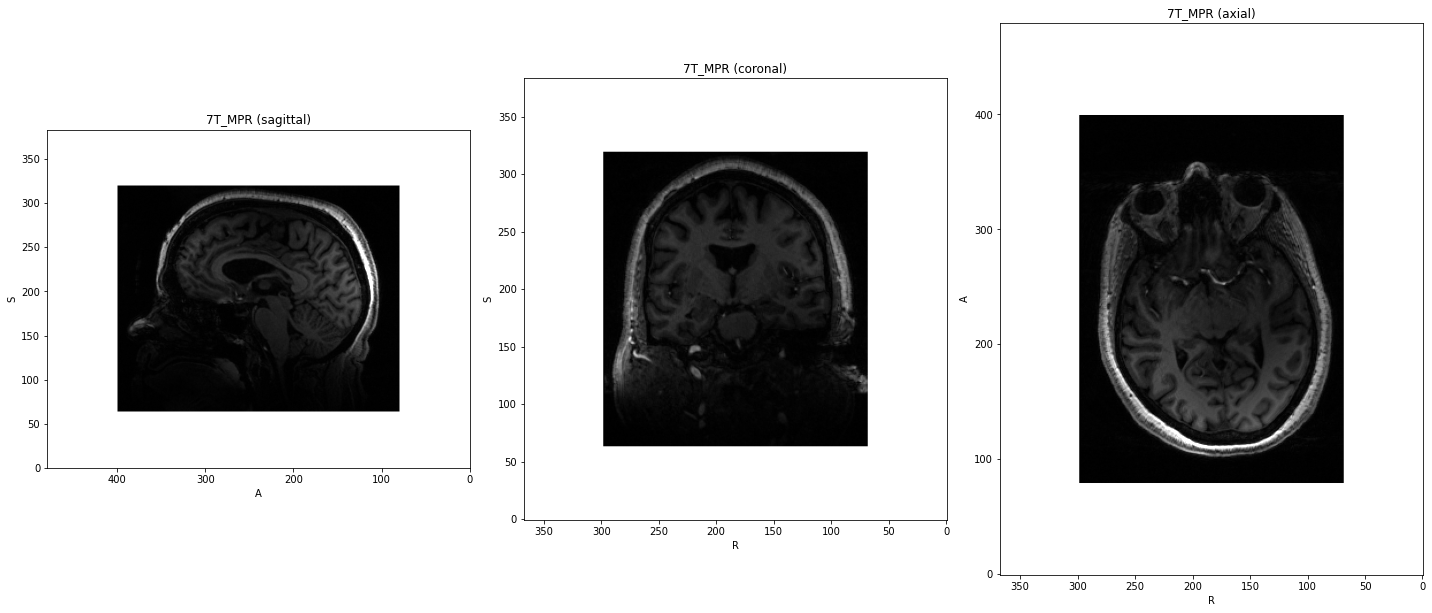



Subject: 1


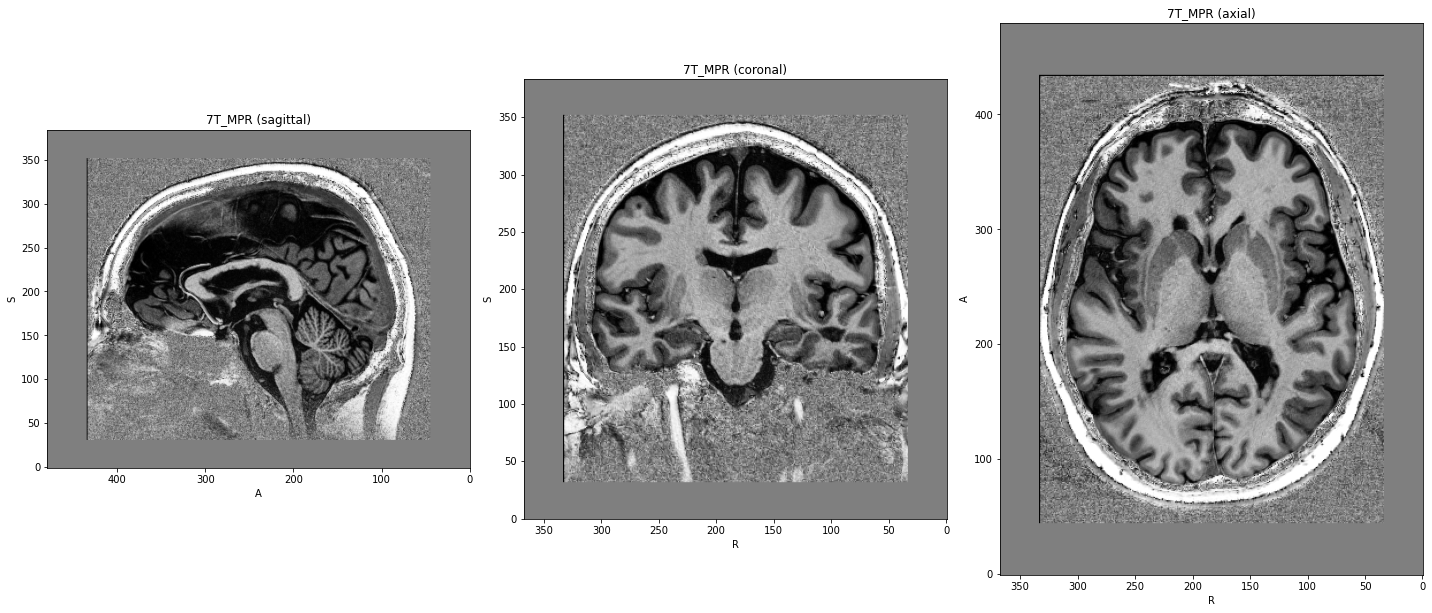



Subject: 2


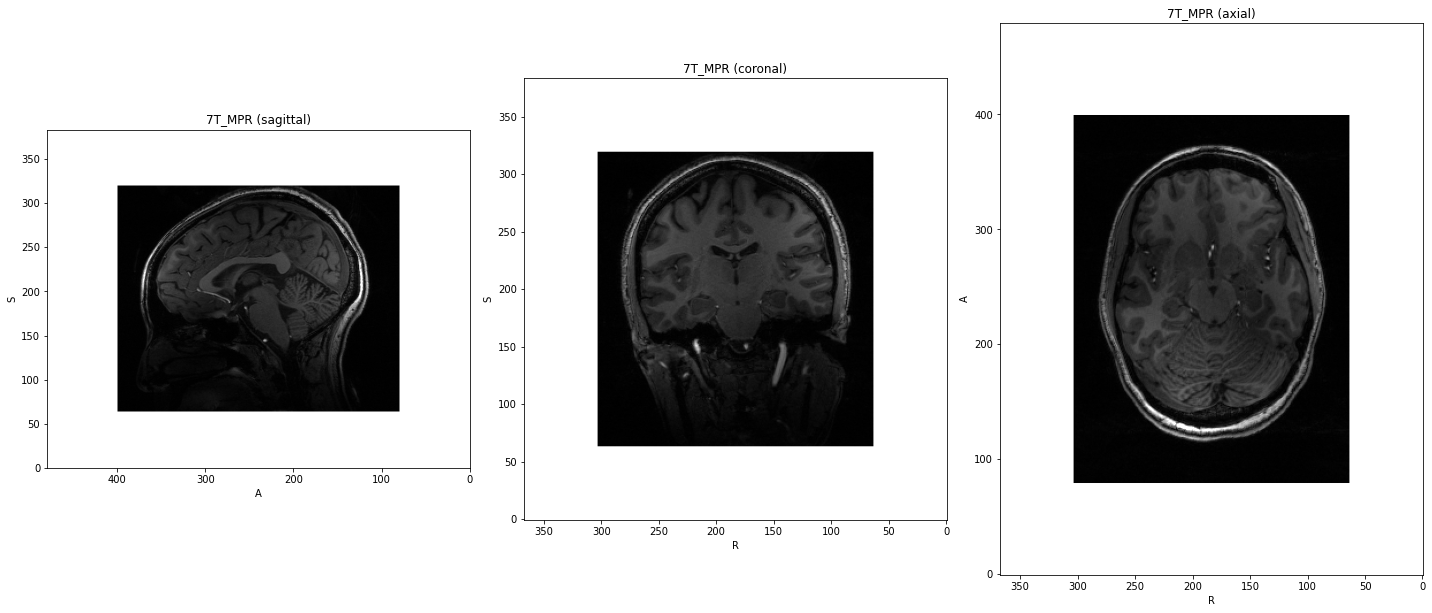

In [57]:
plot_batch(train_batch)

Subject: 0


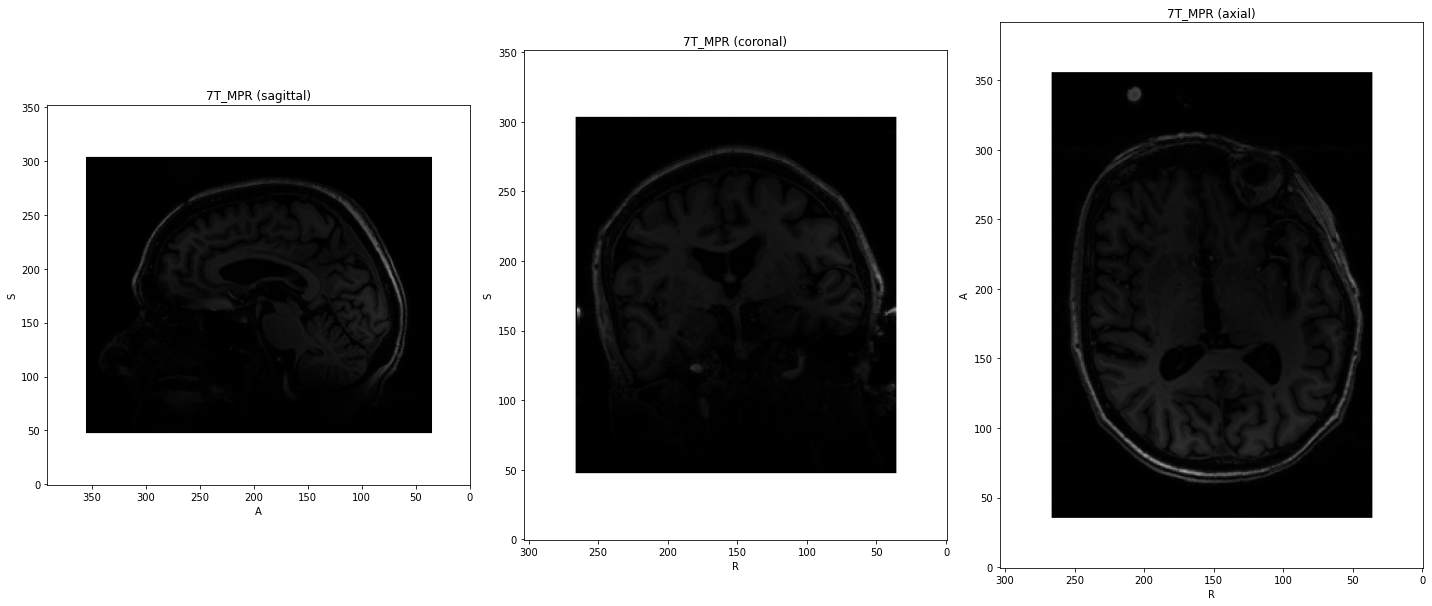



Subject: 1


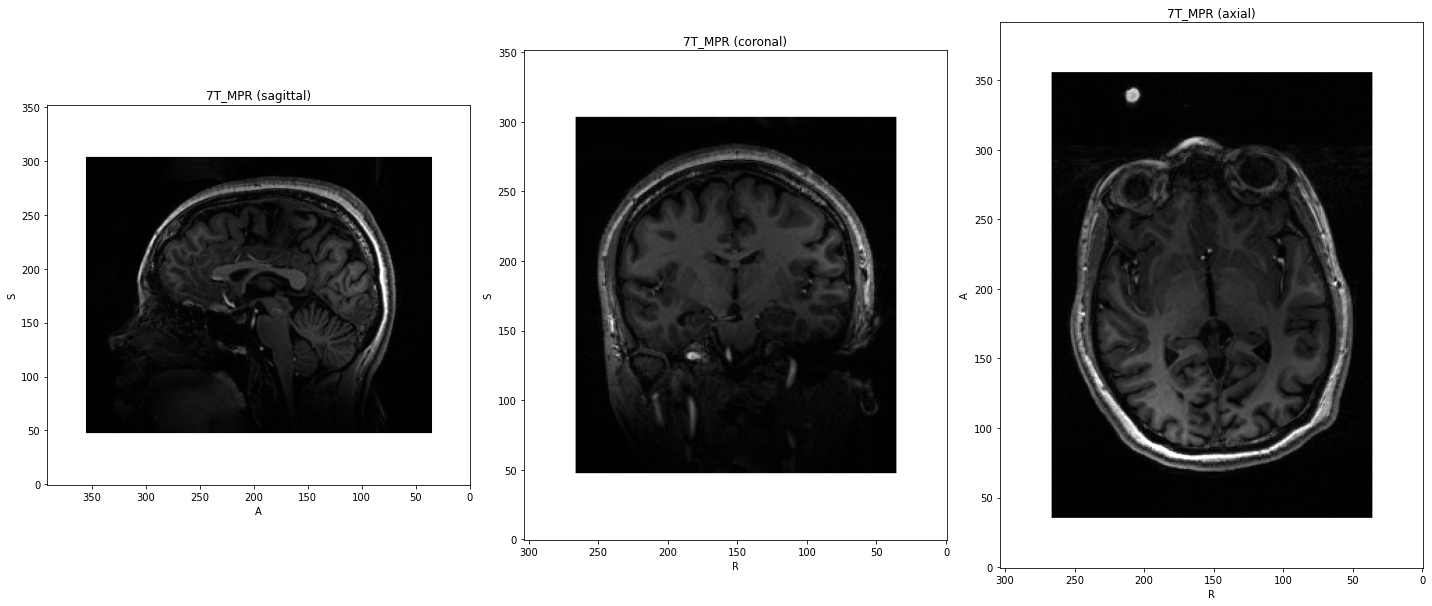



Subject: 2


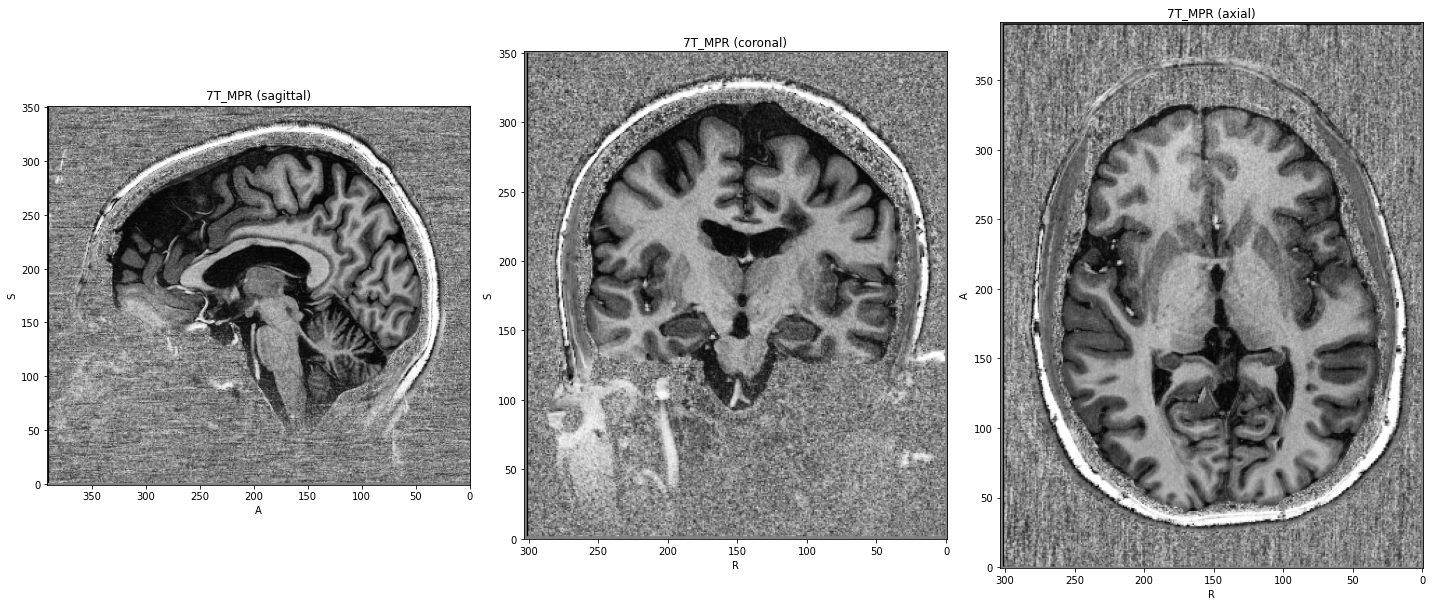

In [50]:
plot_batch(test_batch)

#### Save Preprocessed Images

In [73]:
data.save(train_dataloader, subj_dir='radio_7T_MPR/unprocessed', fold='train')
data.save(test_dataloader, subj_dir='radio_7T_MPR/unprocessed', fold='test')
data.save(val_dataloader, subj_dir='radio_7T_MPR/unprocessed', fold='val')